In [215]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import re
import statistics
import shutil
import json 

In [216]:
def movingAverage(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


folder_path = r'C:\Users\custe\Downloads\TMAZE_DATA'#'N:\TMAZE\TMAZE_DATA' #r'C:\Users\pliu79\Downloads\TMAZE_DATA'
file_pattern = '*.json' 
files = glob.glob(os.path.join(folder_path, file_pattern)) 

In [217]:
#Correctness

files.sort(key= lambda x: x[-20:-5])
mouseID = 'BDC4'
list_of_files = []

for file in files: 
    if mouseID in file: 
        list_of_files.append(file)

        

correctness = {}
trialDuration = {}
direction = {}

max_trial_numbers = [] 
sessionDate = []
texture = []
for sessionID, file in enumerate(list_of_files[:]):
    data = pd.read_json(file, typ='frame')
    print(file)
    date = data[mouseID]['trial1']['trial_time']
    sessionDate.append('{0}_{1}_{2}'.format(date[0],date[1],date[2]))
    correctness[sessionID] = []
    trialDuration[sessionID] = []
    direction[sessionID] = []
    
    
    trial_numbers = [data[mouseID]['trial'+str(n+1)]['trial_number'] for n in range(len(data[mouseID]))]
    
    max_trial_numbers.append(max(trial_numbers))
    try: 
        texture.append(data[mouseID]['trial'+str(0+1)]['MazeTexture'])
    except KeyError:
        texture.append('gratings')
    for n in range(len(data[mouseID])):
        if n == 0:
            print(data[mouseID]['trial'+str(n+1)])
        correctness[sessionID].append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
        try:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['lick'] == 'right(V2)')
        except KeyError:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['valve'] == 'right')
        trialDuration[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        
        # if data[mouseID]['trial'+str(n+1)]['decision'] == 'correct':
        #     trial_times_correct[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        # else:
        #     trial_times_incorrect[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])

all_correctness = np.concatenate([correctness[n] for n in np.sort(list(correctness.keys()))])
session_lengths = [len(n) for n in [correctness[n] for n in np.sort(list(correctness.keys()))]]
session_lengths_cum = np.cumsum(session_lengths)

all_durations = np.concatenate([trialDuration[n] for n in np.sort(list(trialDuration.keys()))])
all_directions = np.concatenate([direction[n] for n in np.sort(list(direction.keys()))])

# Correct = []
# Correct_avg=[]    
# for session in trial_times_correct:
#     Correct.append(trial_times_correct[session])
#     Correct_avg.append(movingAverage(trial_times_correct[session]))

# # print(resultCorrect)
# # print(list_of_files)
# print(Correct_avg)

# plt.figure()
# for avg in Correct_avg:
#     plt.plot(avg)
# plt.xlabel('Trials')
# plt.ylabel('Correctness')
# plt.title('Moving Average of Correct Trials for ' + mouseID)

# plt.figure()
# for avg in Correct:
#     plt.step(np.arange(len(avg)),avg)
# plt.xlabel('Trials')
# plt.ylabel('Correctness')
# plt.title('Correct Trials for ' + mouseID)
# plt.legend(title='Session')

# #add all sessions together
# all_trial_correctness = np.concatenate([Correct_avg[n] for n in np.sort(list(Correct_avg.keys()))])#problematic
# plt.figure()
# plt.plot(all_trial_correctness)
# plt.ylabel('Correctness')
# plt.xlabel('Trial')
# plt.title('Concatenated Trials')
# plt.show()


C:\Users\custe\Downloads\TMAZE_DATA\data_BDC4_20240229_115918.json
{'MazeTexture': 'R/S', 'rewardBefLick': True, 'lickUntilCorrect': True, 'decision': 'correct', 'floorID': 'F,2', 'time_for_trial': 6, 'valve': 2, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2024, 2, 29, 12, 9, 30, 3, 60, 0], 'correct_valve': 'V1', 'right_probability': 0.5, 'rewardAmount(ms)': 50}
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC4_20240229_121257.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': True, 'decision': 'incorrect', 'floorID': 'F,3', 'time_for_trial': 78, 'valve': 3, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2024, 2, 29, 12, 13, 6, 3, 60, 0], 'correct_valve': 'V2', 'right_probability': 0.5, 'rewardAmount(ms)': 50}
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC4_20240301_114718.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'correct', 'floorID': 'F,2', 'time_for_trial': 8, 'valve': 2, 'lick': 'left(V1)', 'trial_numb

In [218]:
PRE_summary = {}
CNO_summary = {}
SALINE_summary = {}

In [219]:
## extracting BDC3 correctness for pre-CNO and CNO trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDC3' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
        
CNO_files = []
PRE_files = []
SALINE_files = []

for file in list_of_files:
    print(file)
    if ('20240213' in file) or ('20240215' in file):
        CNO_files.append(file)

    elif '2024020' in file: ## dates occurring between the first and 10th of February
        PRE_files.append(file)

    elif '20240214' in file:
        SALINE_files.append(file)

    

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []
for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness  = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240109_095043.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240109_110356.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240109_153409.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240109_163300.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240109_163753.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240109_171034.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240110_090613.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240110_095932.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240118_175342.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240118_183758.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240118_190913.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240119_130458.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240119_133532.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240119_140140.json
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC3_20240122_133821.

In [220]:
## extracting BDB3 correctness for pre-CNO and CNO trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDB3' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
                            
CNO_files = []
PRE_files = []
SALINE_files = []

for file in list_of_files:
    if ('20240213' in file) or ('20240215' in file):
        CNO_files.append(file)

    elif '2024020' in file: ## dates occurring between the first and 10th of February
        PRE_files.append(file)
    
    elif '20240214' in file:
        SALINE_files.append(file)

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []
for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness  = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

0.6971428571428572 0.7304347826086957 0.5576036866359447


In [221]:
## extracting BDB5 correctness for pre-treatment and SALINE trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDB5' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
        
CNO_files = []
SALINE_files = []
PRE_files = []

for file in list_of_files:
    if ('20240213' in file) or ('20240215' in file):
        SALINE_files.append(file)

    elif ('20240206' in file) or ('20240207' in file) or ('20240208' in file) or ('20240209' in file) or ('20240212' in file): ## pre-treatment dates
        PRE_files.append(file)

    elif '20240214' in file:
        CNO_files.append(file)

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []

for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

0.7256637168141593 0.8820754716981132 0.7450980392156863


In [222]:
## extracting BDC5 correctness for pre-treatment and SALINE trials
files.sort(key= lambda x: x[-20:-5]) ## sorting all files by timestamp
mouseID = 'BDC5' ## selecting one mouse
list_of_files = [] ## creating a list of files that contain the mouseID
for file in files:
    if mouseID in file:
        list_of_files.append(file)
        
CNO_files = []
SALINE_files = []
PRE_files = []

for file in list_of_files:
    if ('20240213' in file) or ('20240215' in file):
        SALINE_files.append(file)

    elif '2024020' in file: ## pre-treatment dates
        PRE_files.append(file)

    elif '20240214' in file:
        CNO_files.append(file)

CNO_correctness = []
PRE_correctness = []
SALINE_correctness = []

for file in PRE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        PRE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in CNO_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        CNO_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

for file in SALINE_files:
    data = pd.read_json(file, typ='frame')
    for n in range(len(data[mouseID])):
        SALINE_correctness.append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')

CNO_correctness = np.array(CNO_correctness)
PRE_correctness = np.array(PRE_correctness)
SALINE_correctness = np.array(SALINE_correctness)
print(PRE_correctness.mean(),SALINE_correctness.mean(),CNO_correctness.mean())

CNO_summary[mouseID] = CNO_correctness.mean()
PRE_summary[mouseID] = PRE_correctness.mean()
SALINE_summary[mouseID] = SALINE_correctness.mean()

0.7521367521367521 0.8394160583941606 0.6390977443609023


In [223]:
summaryData = pd.DataFrame([PRE_summary,SALINE_summary,CNO_summary],index=['PRE','SALINE','CNO\n5mg/kg'])

summaryData2 = pd.DataFrame([SALINE_summary,CNO_summary],index=['SALINE','CNO\n5mg/kg'])

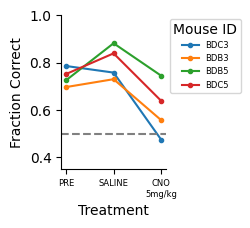

In [224]:
f = plt.figure(figsize=[1.35,2])
ax = f.gca()
summaryData.plot(kind='line',marker='o',ax=ax,ms=3)
ax.axhline(0.5,ls='--',color='gray')#,label='chance')
ax.set_ylim([0.35,1])

ax.set_ylabel('Fraction Correct')
ax.set_xlabel('Treatment')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=[1.0,0.5,0.5,0.5],title='Mouse ID',fontsize=6)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['PRE','SALINE','CNO\n5mg/kg'],fontsize=6)
plt.savefig(r'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\TMAZE_CNO_summaryData.pdf',dpi=600,bbox_inches='tight',transparent=True)

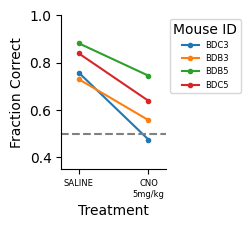

In [225]:
f = plt.figure(figsize=[1.35,2])
ax = f.gca()
summaryData2.plot(kind='line',marker='o',ax=ax,ms=3)
ax.axhline(0.5,ls='--',color='gray')#,label='chance')
ax.set_ylim([0.35,1])

ax.set_ylabel('Fraction Correct')
ax.set_xlabel('Treatment')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=[1.0,0.5,0.5,0.5],title='Mouse ID',fontsize=6)
ax.set_xticks([0,1])
ax.set_xlim([-0.25,1.25])
ax.set_xticklabels(['SALINE','CNO\n5mg/kg'],fontsize=6)
plt.savefig(r'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\CNO_Experiment\TMAZE_CNO_summaryData2.pdf',dpi=600,bbox_inches='tight',transparent=True)

In [226]:
summaryData.T.keys()

Index(['PRE', 'SALINE', 'CNO\n5mg/kg'], dtype='object')

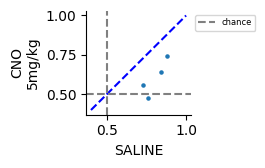

In [227]:
f = plt.figure(figsize=[1.35,1.35])
ax = f.gca()
ax.scatter(x=summaryData.T['SALINE'],y=summaryData.T['CNO\n5mg/kg'],marker='o',s=5)
ax.plot([0.4,1],[0.4,1],ls='--',color='b')#,label='chance')
#ax.set_ylim([0.35,1])
ax.axhline(0.5,ls='--',color='gray',label='chance')
ax.axvline(0.5,ls='--',color='gray')#,label='chance')
ax.set_ylabel('CNO\n5mg/kg')
ax.set_xlabel('SALINE')
ax.legend(fontsize=6,bbox_to_anchor=[1.0,0.5,0.5,0.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(r'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\TMAZE_CNO_summaryData_scatter.pdf',dpi=600,bbox_inches='tight',transparent=True)

C:\Users\custe\Downloads\TMAZE_DATA\data_BFL4_20240909_173528.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': True, 'decision': 'correct', 'floorID': 'F,2', 'time_for_trial': 49, 'valve': 2, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2024, 9, 9, 17, 38, 57, 0, 253, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 35, 'BiasCorrection(T/F)': False, 'coneHeight_1(floor1)': '1.5', 'coneHeight_2(floor2)': '1.5'}
C:\Users\custe\Downloads\TMAZE_DATA\data_BFL4_20240911_101416.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,1', 'time_for_trial': 5, 'valve': 1, 'lick': 'left(V1)', 'trial_number': 1, 'trial_time': [2024, 9, 11, 10, 17, 56, 2, 255, 1], 'right_probability': 1.0, 'rewardAmount(ms)': 50, 'BiasCorrection(T/F)': True, 'coneHeight_1(floor1)': '1.5', 'coneHeight_2(floor2)': '1.5'}
C:\Users\custe\Downloads\TMAZE_DATA\data_BFL4_20240911_105644.json
{'MazeTexture': 'R/S', 'rewardBefLick

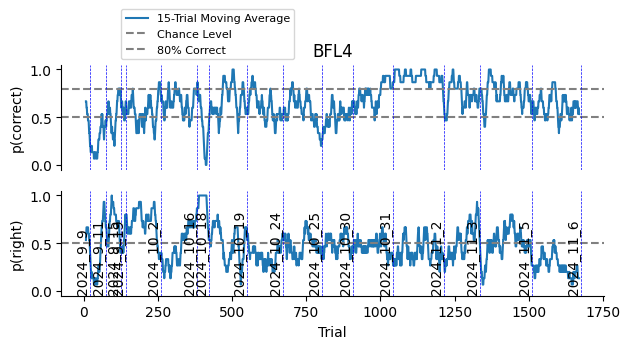

In [228]:
files.sort(key= lambda x: x[-20:-5])
mouseID = 'BFL4'
list_of_files = []

for file in files: 
    if mouseID in file: 
        list_of_files.append(file)

        

correctness = {}
trialDuration = {}
direction = {}

max_trial_numbers = [] 
sessionDate = []
texture = []
for sessionID, file in enumerate(list_of_files):
    data = pd.read_json(file, typ='frame')
    print(file)
    date = data[mouseID]['trial1']['trial_time']
    sessionDate.append('{0}_{1}_{2}'.format(date[0],date[1],date[2]))
    correctness[sessionID] = []
    trialDuration[sessionID] = []
    direction[sessionID] = []
    
    
    trial_numbers = [data[mouseID]['trial'+str(n+1)]['trial_number'] for n in range(len(data[mouseID]))]
    
    max_trial_numbers.append(max(trial_numbers))
    try: 
        texture.append(data[mouseID]['trial'+str(0+1)]['MazeTexture'])
    except KeyError:
        texture.append('gratings')
    for n in range(len(data[mouseID])):
        if n == 0:
            print(data[mouseID]['trial'+str(n+1)])
        correctness[sessionID].append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
        try:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['lick'] == 'right(V2)')
        except KeyError:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['valve'] == 'right')
        trialDuration[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        
        # if data[mouseID]['trial'+str(n+1)]['decision'] == 'correct':
        #     trial_times_correct[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        # else:
        #     trial_times_incorrect[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])

all_correctness = np.concatenate([correctness[n] for n in np.sort(list(correctness.keys()))])
session_lengths = [len(n) for n in [correctness[n] for n in np.sort(list(correctness.keys()))]]
session_lengths_cum = np.cumsum(session_lengths)

all_durations = np.concatenate([trialDuration[n] for n in np.sort(list(trialDuration.keys()))])
all_directions = np.concatenate([direction[n] for n in np.sort(list(direction.keys()))])

MA_n = 15
f, ax = plt.subplots(2,1, figsize=[7,3])
#plt.step(np.arange(len(all_correctness)),all_correctness,lw=0.5)
#plt.plot(movingAverage(all_correctness,5),label='MA n = 5')
xaxis = np.arange(len(movingAverage(all_correctness,MA_n)))+MA_n/2
ax[0].plot(xaxis,movingAverage(all_correctness,MA_n),label='{}-Trial Moving Average'.format(MA_n))
# ax.plot(movingAverage(all_correctness,20),label='MA n = 20')
ax[1].plot(xaxis,movingAverage(all_directions,MA_n),label='MAdirection n = {}'.format(MA_n))
# ax2 = ax.twinx()
# ax2.plot(all_durations,label='Trial Duration (s)')
ax[0].axhline(0.5,ls='--',color='gray',label='Chance Level')
ax[0].axhline(0.8,ls='--',color='gray',label='80% Correct')
ax[1].axhline(0.5,ls='--',color='gray',label='Chance Level')
for i, sessionBoundary in enumerate(session_lengths_cum):
    try:
        if sessionDate[i] != sessionDate[i+1]:
            ax[0].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
            ax[1].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
            ax[1].text(sessionBoundary,0,sessionDate[i],ha='right',rotation=90)
    except IndexError:
        ax[0].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
        ax[1].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
        
        ax[1].text(sessionBoundary,0,sessionDate[i],ha='right',rotation=90)
# for i, text in enumerate(texture):
    # if text == 'R/S':
    #     ax[0].fill_betweenx([-0.05,1.05],session_lengths_cum[i-1],session_lengths_cum[i],color='r',alpha=0.1,edgecolor=None)
    #     ax[1].fill_betweenx([-0.05,1.05],session_lengths_cum[i-1],session_lengths_cum[i],color='r',alpha=0.1,edgecolor=None)
# ax[0].arrow(session_lengths_cum[-6],1.3,0,-0.1,head_width=10,head_length=0.05,color='r',clip_on=False)
# ax[0].text(session_lengths_cum[-6],1.3,'Whisker Trim',ha='center',va='bottom',color='r')
ax[0].legend(bbox_to_anchor=(0.1, 1.0),fontsize=8)
ax[0].set_ylim([-0.05,1.05])
ax[1].set_ylim([-0.05,1.05])
ax[1].set_xlabel('Trial')
ax[0].set_ylabel('p(correct)')
ax[1].set_ylabel('p(right)')
ax[0].set_xticks([])
ax[0].set_title(mouseID)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

C:\Users\custe\Downloads\TMAZE_DATA\data_BDC4_20240401_182231.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'correct', 'floorID': 'F,3', 'time_for_trial': 2, 'valve': 3, 'lick': 'right(V2)', 'trial_number': 1, 'trial_time': [2024, 4, 1, 18, 22, 34, 0, 92, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 50}
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC4_20240401_183800.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'correct', 'floorID': 'F,3', 'time_for_trial': 2, 'valve': 3, 'lick': 'right(V2)', 'trial_number': 1, 'trial_time': [2024, 4, 1, 18, 38, 7, 0, 92, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 50}
C:\Users\custe\Downloads\TMAZE_DATA\data_BDC4_20240402_130354.json
{'MazeTexture': 'R/S', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'incorrect', 'floorID': 'F,2', 'time_for_trial': 2, 'valve': 2, 'lick': 'right(V2)', 'trial_number': 1, 'trial_time': [2024, 4, 2, 13, 6, 

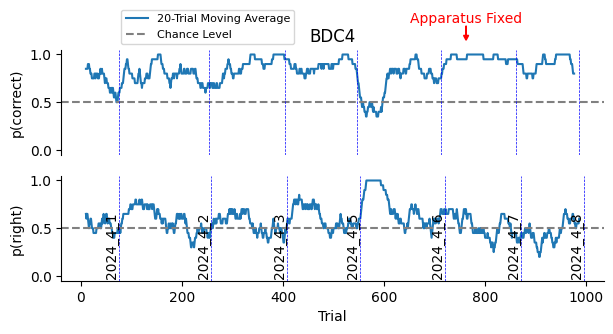

In [229]:
## Plotting BAB2 with whisker trim indication (occurred on 11/1/2023)
#Correctness

files.sort(key= lambda x: x[-20:-5])
mouseID = 'BDC4'
list_of_files = []

for file in files: 
    if mouseID in file: 
        list_of_files.append(file)

        

correctness = {}
trialDuration = {}
direction = {}

max_trial_numbers = [] 
sessionDate = []
texture = []
for sessionID, file in enumerate(list_of_files[-22:]):
    data = pd.read_json(file, typ='frame')
    print(file)
    date = data[mouseID]['trial1']['trial_time']
    sessionDate.append('{0}_{1}_{2}'.format(date[0],date[1],date[2]))
    correctness[sessionID] = []
    trialDuration[sessionID] = []
    direction[sessionID] = []
    
    
    trial_numbers = [data[mouseID]['trial'+str(n+1)]['trial_number'] for n in range(len(data[mouseID]))]
    
    max_trial_numbers.append(max(trial_numbers))
    try: 
        texture.append(data[mouseID]['trial'+str(0+1)]['MazeTexture'])
    except KeyError:
        texture.append('gratings')
    for n in range(len(data[mouseID])):
        if n == 0:
            print(data[mouseID]['trial'+str(n+1)])
        correctness[sessionID].append(data[mouseID]['trial'+str(n+1)]['decision'] == 'correct')
        try:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['lick'] == 'right(V2)')
        except KeyError:
            direction[sessionID].append(data[mouseID]['trial'+str(n+1)]['valve'] == 'right')
        trialDuration[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        
        # if data[mouseID]['trial'+str(n+1)]['decision'] == 'correct':
        #     trial_times_correct[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])
        # else:
        #     trial_times_incorrect[sessionID].append(data[mouseID]['trial'+str(n+1)]['time_for_trial'])

all_correctness = np.concatenate([correctness[n] for n in np.sort(list(correctness.keys()))])
session_lengths = [len(n) for n in [correctness[n] for n in np.sort(list(correctness.keys()))]]
session_lengths_cum = np.cumsum(session_lengths)

all_durations = np.concatenate([trialDuration[n] for n in np.sort(list(trialDuration.keys()))])
all_directions = np.concatenate([direction[n] for n in np.sort(list(direction.keys()))])

MA_n = 20
f, ax = plt.subplots(2,1, figsize=[7,3])
#plt.step(np.arange(len(all_correctness)),all_correctness,lw=0.5)
#plt.plot(movingAverage(all_correctness,5),label='MA n = 5')
xaxis = np.arange(len(movingAverage(all_correctness,MA_n)))+MA_n/2
ax[0].plot(xaxis,movingAverage(all_correctness,MA_n),label='{}-Trial Moving Average'.format(MA_n))
# ax.plot(movingAverage(all_correctness,20),label='MA n = 20')
ax[1].plot(xaxis,movingAverage(all_directions,MA_n),label='MAdirection n = {}'.format(MA_n))
# ax2 = ax.twinx()
# ax2.plot(all_durations,label='Trial Duration (s)')
ax[0].axhline(0.5,ls='--',color='gray',label='Chance Level')
ax[1].axhline(0.5,ls='--',color='gray',label='Chance Level')
for i, sessionBoundary in enumerate(session_lengths_cum):
    try:
        if sessionDate[i] != sessionDate[i+1]:
            ax[0].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
            ax[1].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
            ax[1].text(sessionBoundary,0,sessionDate[i],ha='right',rotation=90)
    except IndexError:
        ax[0].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
        ax[1].axvline(sessionBoundary,ls='--',color='b',lw=0.5)
        ax[1].text(sessionBoundary,0,sessionDate[i],ha='right',rotation=90)
# for i, text in enumerate(texture):
    # if text == 'R/S':
    #     ax[0].fill_betweenx([-0.05,1.05],session_lengths_cum[i-1],session_lengths_cum[i],color='r',alpha=0.1,edgecolor=None)
    #     ax[1].fill_betweenx([-0.05,1.05],session_lengths_cum[i-1],session_lengths_cum[i],color='r',alpha=0.1,edgecolor=None)
ax[0].arrow(session_lengths_cum[-6],1.3,0,-0.1,head_width=10,head_length=0.05,color='r',clip_on=False)
ax[0].text(session_lengths_cum[-6],1.3,'Apparatus Fixed',ha='center',va='bottom',color='r')
ax[0].legend(bbox_to_anchor=(0.1, 1.0),fontsize=8)
ax[0].set_ylim([-0.05,1.05])
ax[1].set_ylim([-0.05,1.05])
ax[1].set_xlabel('Trial')
ax[0].set_ylabel('p(correct)')
ax[1].set_ylabel('p(right)')
ax[0].set_xticks([])
ax[0].set_title(mouseID)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

In [230]:
file_pattern = '*.json' 
files = glob.glob(os.path.join(folder_path, file_pattern)) 

file_groups = {}

for file in files:
    parts = os.path.basename(file).split('_')
    mouse_id = parts[1]
    date_str = parts[2]
    file_groups.setdefault((date_str, mouse_id), []).append(file)

correctness = {}
for group in file_groups:
    tempFiles = file_groups[group]
    tempFiles.sort()

    
    correctness[group] = []
    for file in tempFiles:
        data = pd.read_json(file, typ='frame')
        for n in range(len(data[group[1]])):
            correctness[group].append(data[group[1]]['trial'+str(n+1)]['decision'] == 'correct')


performance = {}
for group in correctness:
    performance[group] = sum(correctness[group])/len(correctness[group])

performance_byMouse = {}
date_byMouse = {}

for group in performance:
    performance_byMouse[group[1]] = performance_byMouse.get(group[1], []) + [performance[group]]
    date_byMouse[group[1]] = date_byMouse.get(group[1], []) + [group[0]]


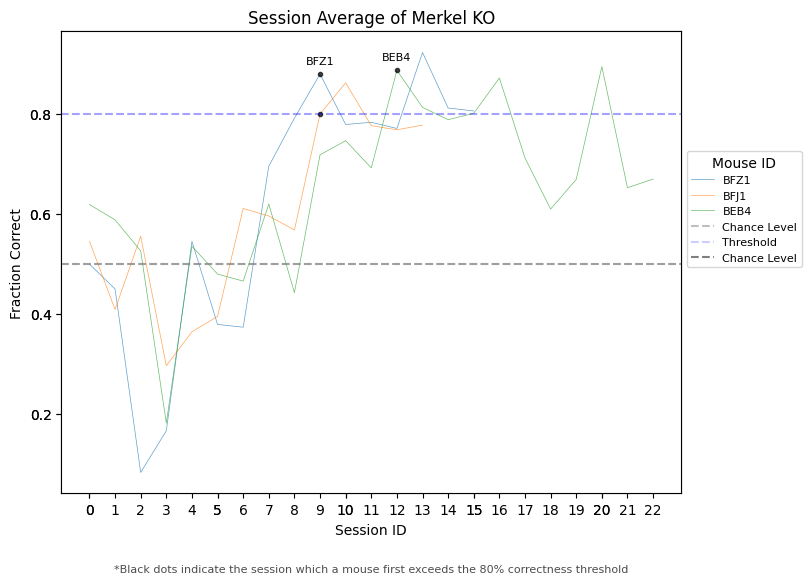

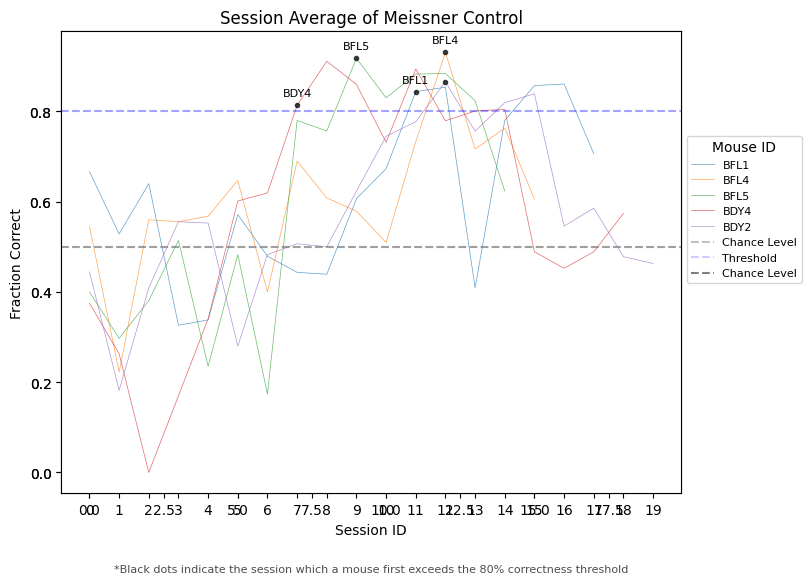

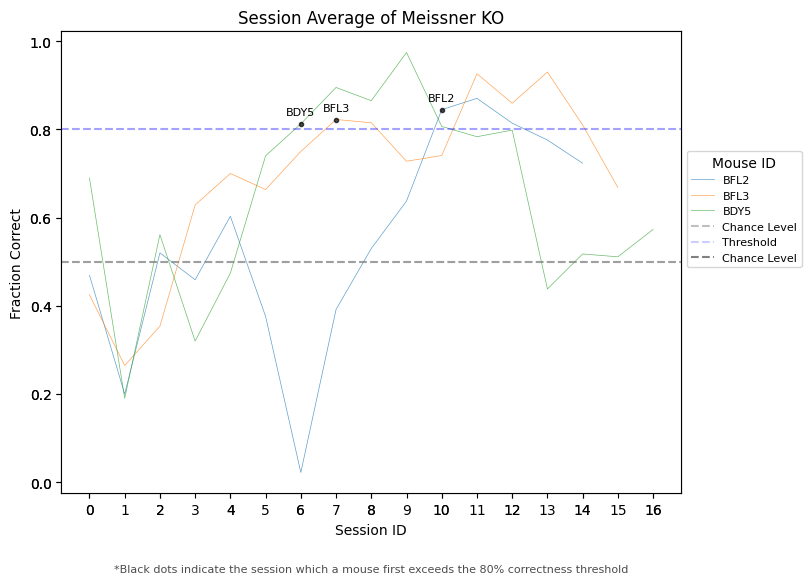

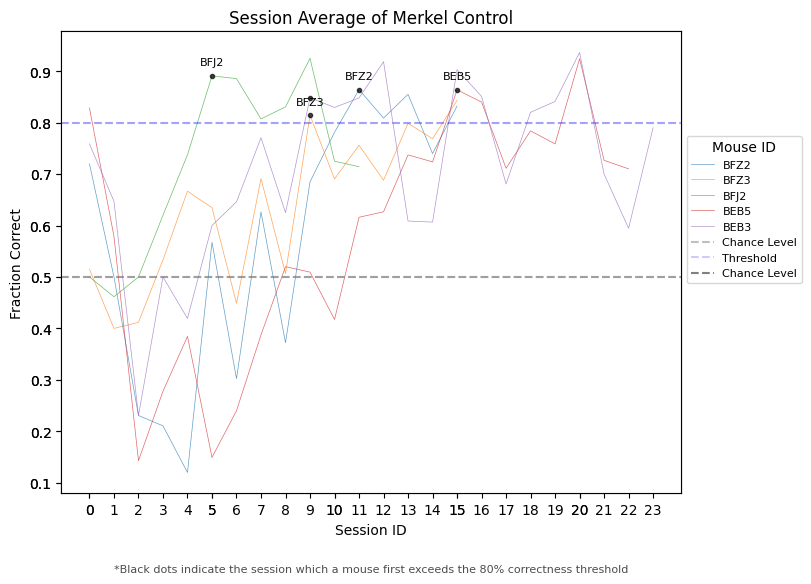

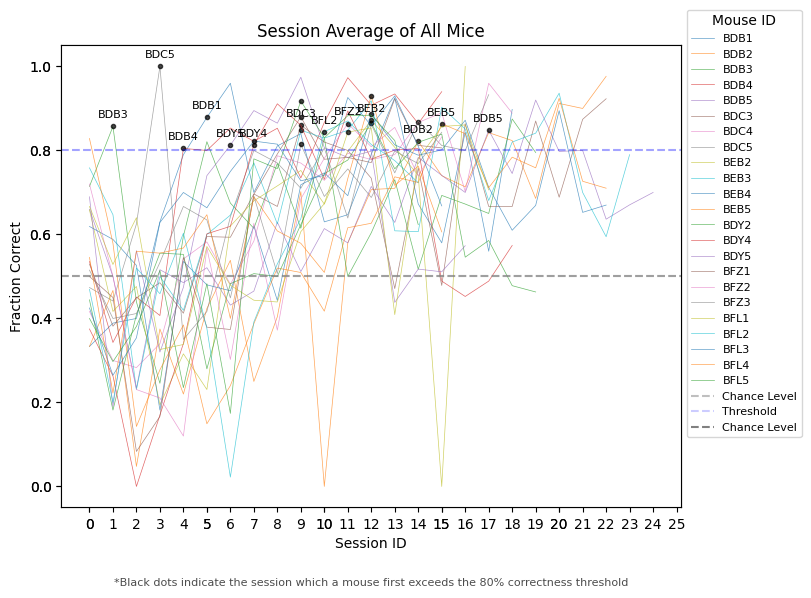

In [231]:
#plotting seperately 

for MouseList, title in mouse_groups:
    # Initialize figure for the group
    fig, ax = plt.subplots(figsize=(8, 6))
    temp = np.array([performance_byMouse.get(mouse, []) for mouse in MouseList], dtype=object)
    #how to find an alternative to include all the mice in a mouse list instead of doing this? - Problem solved above
    #temp = np.array([performance_byMouse['BDB1'],performance_byMouse['BDB2'],performance_byMouse['BDB3'],performance_byMouse['BDB4'],performance_byMouse['BDB5'],performance_byMouse['BDC5'],performance_byMouse['BDC5']],dtype=object)

    A = np.full((len(MouseList), max([len(n) for n in temp])), np.nan) #initialize the matrix with Nan vallues

    for i, j in enumerate(temp):
        A[i, :len(j)] = j

    for i, mouse_data in enumerate(A[:] ):
        mouse_id = MouseList[i]
        ax.plot(mouse_data, lw=0.5, label=mouse_id, alpha=0.7)
        crossing_index = first_crossing(mouse_data, threshold=0.8)
        if crossing_index is not None:
            ax.plot(crossing_index, mouse_data[crossing_index], 'o', color='black', markersize=3, alpha=0.7)
    ax = plt.axes()
    # # Plot the mean performance
    # mean_performance = np.nanmean(A, axis=0)
    # ax.plot(mean_performance, 'k', lw=1.25, label='Mean',alpha= 1)

    #add function to creat dots of mouse first time reach 80% correctness
    def first_crossing(data, threshold=0.8):
        for i in range(1, len(data)):
            if data[i-1] < threshold <= data[i]:
                return i
        return None

    max_session_indices = np.nanargmax(~np.isnan(A), axis=1)
    #calculates the index of the last non-NaN value (i.e., the largest session number) for each mouse's data.
    # np.isnan(A) returns a boolean array indicating where NaN values are located in the array A.
    # ~np.isnan(A) inverts this array, so True becomes False and False becomes True.
    # np.nanargmax(~np.isnan(A), axis=1) 
        # finds the index of the first occurrence of the maximum value along each row. 
        # Since the array consists of True (1) and False (0), it effectively finds the last session index that is not NaN.

    # Track which x-axis values have been labeled
    labeled_x_values = set()

    # Plot individual mouse performance - Highlight BDB5
    for i, mouse_data in enumerate(A[:]):
        mouse_id = MouseList[i]
        # if mouse_id == 'BDB5':
        #     ax.plot(mouse_data, lw=1.5, label=mouse_id, alpha= 1,color='r')  
        # else:
        ax.plot(mouse_data, lw=0.5, label=mouse_id, alpha = 0.7)
        crossing_index = first_crossing(mouse_data, threshold=0.8)
        if crossing_index is not None:
            ax.plot(crossing_index, mouse_data[crossing_index], 'o', color='black',markersize=3,alpha=0.7)
            #ax.vlines(x=crossing_index, ymin=0, ymax=mouse_data[crossing_index], colors='black',ls='--',alpha=0.5 )#draw vertical line from corssing points
            #Label the mouse with the biggest session number
            max_session_index = max_session_indices[i]##not work
            if crossing_index not in labeled_x_values:
                # ax.text(crossing_index, mouse_data[crossing_index] + 0.02, str(crossing_index), ha='center', fontsize=8)
                ax.text(crossing_index, mouse_data[crossing_index] + 0.02, mouse_id, ha='center', fontsize=8)
                labeled_x_values.add(crossing_index)
                    
            #ax.text(crossing_index, mouse_data[crossing_index] + 0.02, str(crossing_index), ha='center', fontsize=8)#add numbers
    ax.set_title(title)
    ax.set_xlabel('Session ID')
    ax.set_ylabel('Fraction Correct')
    ax.axhline(0.5, ls='--', color='gray', label='Chance Level', alpha=0.5)
    ax.axhline(0.8, ls='--', color='b', label='Threshold', alpha=0.2)

    # Adjust legend to show all mouse IDs (not fully understood yet)
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    legend_labels = list(by_label.keys()) + ['Chance Level', 'Threshold']#threshole ont on legend***
    legend_handles = list(by_label.values()) + [plt.Line2D([0], [0], linestyle='--', color='gray', label='Chance Level')]#,plt.Line2D([0], [0], linestyle='--', color='gray', label='Threshold')]
    ax.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.615), title='Mouse ID', fontsize=8)
    ax.axhline(0.5,ls='--',color='gray',label='Chance Level',alpha = 0.5)
    ax.axhline(0.8,ls='--',color='b',label='Threshold',alpha = 0.2)
    ax.annotate(
        '*Black dots indicate the session which a mouse first exceeds the 80% correctness threshold',
        xy=(0.5, -0.17), xycoords='axes fraction', fontsize=8, ha='center', color='black',alpha=0.7
    )

    # Adjust the x-axis to show the correct session numbers
    ax.set_xticks(range(len(range(A.shape[1]))))
    ax.set_xticklabels(range(A.shape[1]))

    # ax.axvline(x=16,ls='--',label='orientation gratings')
    # ax.axvspan( 16,18,label="orientation gratings", color="crimson", alpha=0.1)

    # Save the figure with the mouse ID in the filename
    
    file_path = rf'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\Session_Average\{title}.jpg'
    plt.savefig(file_path, dpi=600, bbox_inches='tight', transparent=True)


In [232]:
mouseID = 'BDY2'
unique_dates = set()

for file in files:
    if mouseID in file:
        try:
            data = pd.read_json(file, typ='frame')
        except ValueError as e:
            #print(f"Error reading file {file}: {e}")
            continue

        texture = data.get(mouseID, {}).get('trial1', {}).get('MazeTexture', None)
        if texture != 'R/S':
            #print(f"File: {file}, MazeTexture: {texture}")
            continue

        try:
            date = data[mouseID]['trial1']['trial_time']
            date_str = f"{date[0]}_{date[1]}_{date[2]}"
            unique_dates.add(date_str)
        except KeyError as e:
            continue

print(f"Dates with R/S for mouse {mouseID}: {unique_dates}")
print(f"Number of days for mouse {mouseID} with R/S: {len(unique_dates)}")



unique_dates = set()
for file in files:
    if mouseID in file:
        data = pd.read_json(file, typ='frame')
        date = data[mouseID]['trial1']['trial_time'] 
        date_str = f"{date[0]}_{date[1]}_{date[2]}"  
        unique_dates.add(date_str)

print(f"Number of days for mouse trained {mouseID}: {len(unique_dates)}")

Dates with R/S for mouse BDY2: {'2024_7_29', '2024_7_23', '2024_7_24', '2024_7_26', '2024_7_19', '2024_7_18', '2024_8_9', '2024_7_17', '2024_7_10', '2024_7_1', '2024_7_11', '2024_7_15', '2024_7_22', '2024_7_25', '2024_7_9'}
Number of days for mouse BDY2 with R/S: 15
Number of days for mouse trained BDY2: 20


In [238]:
for file in files: 
    if mouseID in file: 
        data = pd.read_json(file, typ='frame')
        try:
            texture = data.get(mouseID, {}).get('trial1', {}).get('MazeTexture', None)
        except KeyError:
            texture = 'gratings'
        print(f"MazeTexture for {file}: {texture}")

        if texture != 'R/S':
            continue
        list_of_files.append(file)
print(f"Filtered files: {list_of_files}")


MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240701_161435.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240709_133645.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240710_195114.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240711_140449.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240711_141517.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240715_111328.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240715_112810.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240715_113418.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240715_173759.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240715_174215.json: R/S
MazeTexture for C:\Users\custe\Downloads\TMAZE_DATA\data_BDY2_20240715_174520.json: R/S
MazeTexture for C:\Users\custe\D

In [239]:
MouseList = ['BDB1','BDB2', 'BDB3', 'BDB4', 'BDB5',
             'BDC3', 'BDC4','BDC5',
             'BEB2','BEB3','BEB4','BEB5',
             'BDY2','BDY4','BDY5',
             'BFZ1','BFZ2','BFZ3',
             'BFL1','BFL2','BFL3','BFL4','BFL5']

MouseList_Meissner_Control = ['BFL1', 'BFL4', 'BFL5', 'BDY4', 'BDY2']
MouseList_Meissner_KO = ['BFL2', 'BFL3', 'BDY5']
MouseList_Merkel_Control = ['BFZ2', 'BFZ3', 'BFJ2', 'BEB5', 'BEB3']
MouseList_Merkel_KO = ['BFZ1', 'BFJ1', 'BEB4']

mouse_groups = [
    (MouseList_Merkel_KO, 'Session Average of Merkel KO'),
    (MouseList_Meissner_Control, 'Session Average of Meissner Control'),
    (MouseList_Meissner_KO, 'Session Average of Meissner KO'),
    (MouseList_Merkel_Control, 'Session Average of Merkel Control'),
    (MouseList, 'Session Average of All Mice')
]


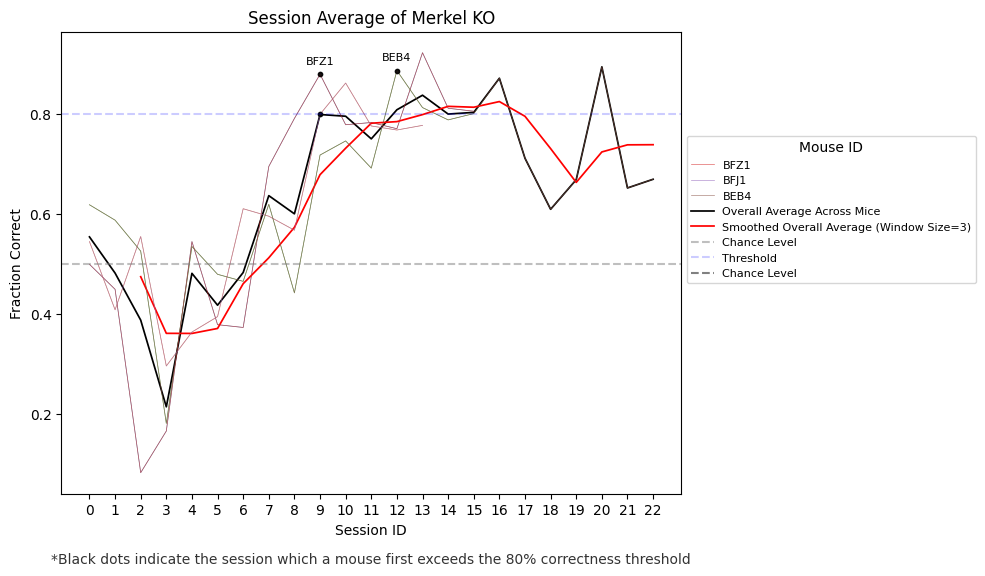

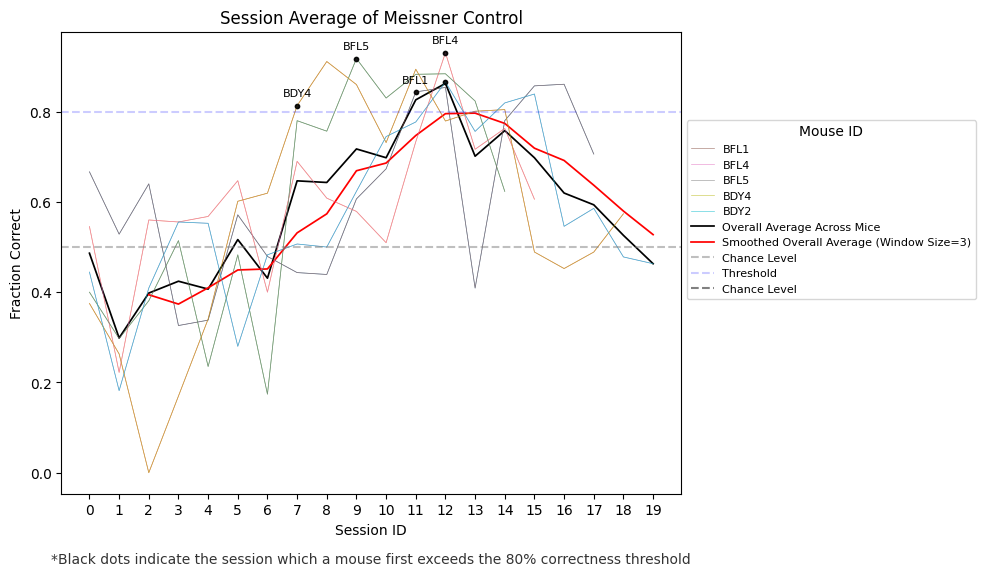

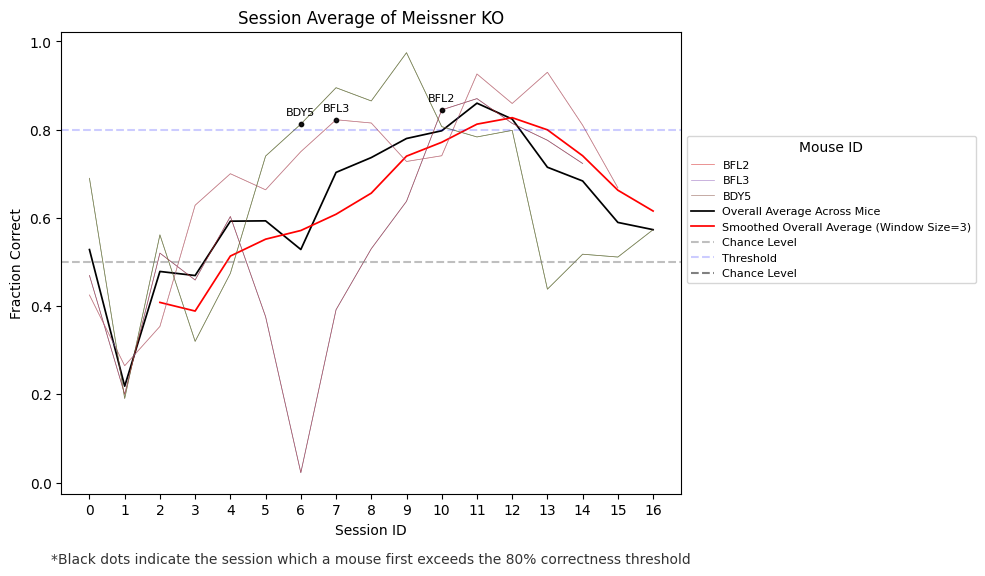

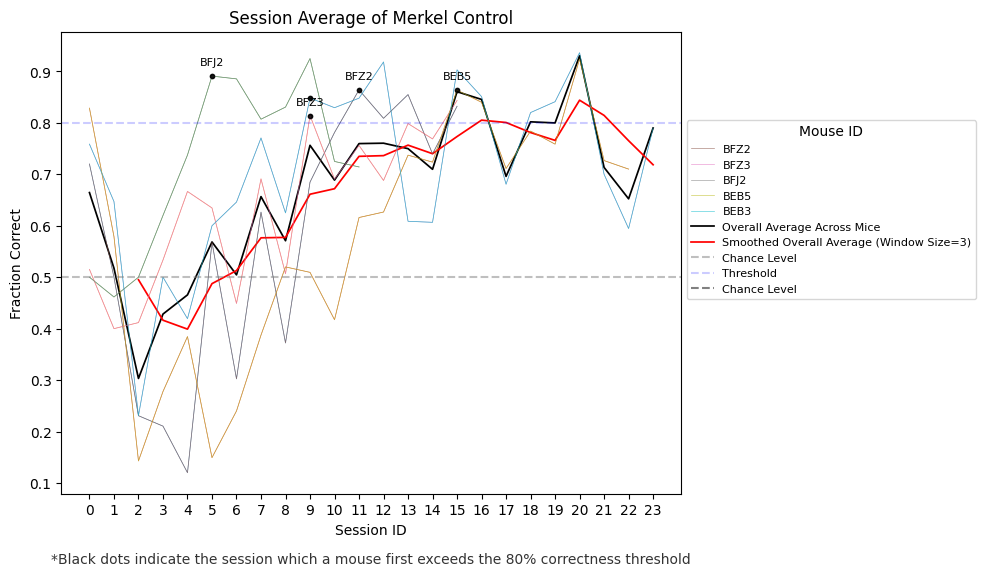

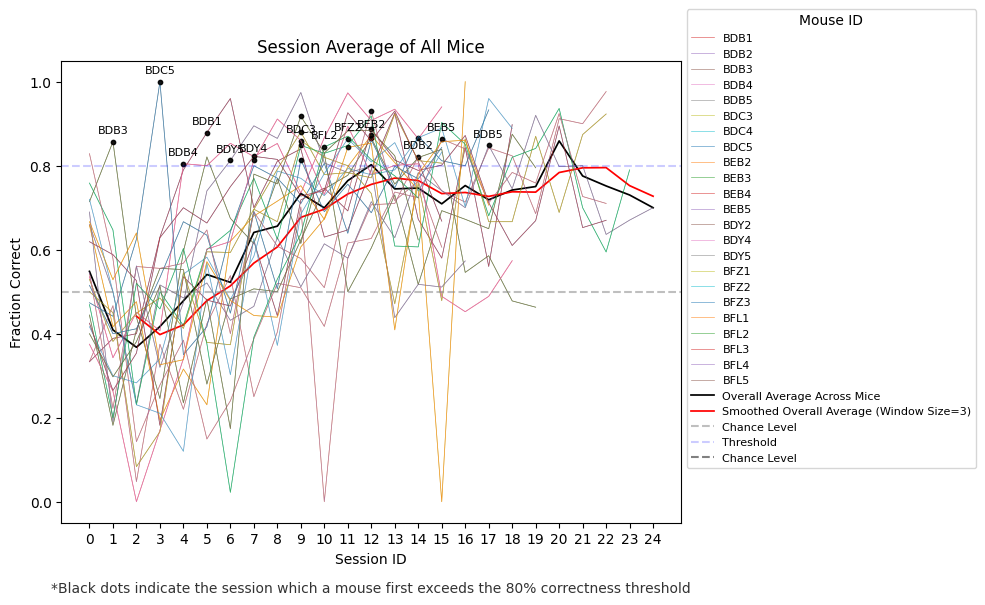

In [240]:
# Overall Average + Moving AVerage
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


def first_crossing(data, threshold=0.8):
    for i in range(1, len(data)):
        if data[i-1] < threshold <= data[i]:
            return i
    return None


for MouseList, title in mouse_groups:
    fig, ax = plt.subplots(figsize=(8, 6))
    temp = np.array([performance_byMouse.get(mouse, []) for mouse in MouseList], dtype=object)

    A = np.full((len(MouseList), max([len(n) for n in temp])), np.nan)

    for i, j in enumerate(temp):
        A[i, :len(j)] = j

    
    for i, mouse_data in enumerate(A[:]):
        mouse_id = MouseList[i]
        ax.plot(mouse_data, lw=0.5, label=mouse_id, alpha=0.7)
        crossing_index = first_crossing(mouse_data, threshold=0.8)
        if crossing_index is not None:
            ax.plot(crossing_index, mouse_data[crossing_index], 'o', color='black', markersize=3, alpha=0.7)

   #Calculate the overall average performance for all mice
    mean_performance = np.nanmean(A, axis=0) 
    ax.plot(mean_performance, 'k', lw=1.25, label='Overall Average Across Mice', alpha=1)  #overall average line

    # Apply moving average to the overall average, smoothed
    window_size = 3
    smoothed_mean = moving_average(mean_performance, window_size = window_size)
    ax.plot(range(window_size-1, len(mean_performance)), smoothed_mean, 
            'r-', lw=1.25, label=f'Smoothed Overall Average (Window Size={window_size})', alpha=1)

  

    max_session_indices = np.nanargmax(~np.isnan(A), axis=1)

    labeled_x_values = set()
    for i, mouse_data in enumerate(A[:]):
        mouse_id = MouseList[i]
        ax.plot(mouse_data, lw=0.5, label=mouse_id, alpha=0.7)
        crossing_index = first_crossing(mouse_data, threshold=0.8)
        if crossing_index is not None:
            ax.plot(crossing_index, mouse_data[crossing_index], 'o', color='black', markersize=3, alpha=0.7)
            max_session_index = max_session_indices[i]
            if crossing_index not in labeled_x_values:
                ax.text(crossing_index, mouse_data[crossing_index] + 0.02, mouse_id, ha='center', fontsize=8)
                labeled_x_values.add(crossing_index)

    ax.set_title(title)
    ax.set_xlabel('Session ID')
    ax.set_ylabel('Fraction Correct')
    ax.axhline(0.5, ls='--', color='gray', label='Chance Level', alpha=0.5)
    ax.axhline(0.8, ls='--', color='b', label='Threshold', alpha=0.2)

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    legend_labels = list(by_label.keys()) + ['Chance Level', 'Threshold']
    legend_handles = list(by_label.values()) + [plt.Line2D([0], [0], linestyle='--', color='gray', label='Chance Level')]
    ax.legend(legend_handles, legend_labels, loc='center left', bbox_to_anchor=(1, 0.615), title='Mouse ID', fontsize=8)

    ax.annotate(
        '*Black dots indicate the session which a mouse first exceeds the 80% correctness threshold',
        xy=(0.5, -0.15), xycoords='axes fraction', fontsize=10, ha='center', color='black', alpha=0.8
    )

    ax.set_xticks(range(len(range(A.shape[1]))))
    ax.set_xticklabels(range(A.shape[1]))

    file_path = rf'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\Session_Average\Overall_Average_Labeled_{title}.jpg'
    plt.savefig(file_path, dpi=600, bbox_inches='tight', transparent=True)


In [236]:
print("Legend Handles:", handles)
print("Legend Labels:", labels)

Legend Handles: [<matplotlib.lines.Line2D object at 0x0000014302617D10>, <matplotlib.lines.Line2D object at 0x0000014363397AD0>, <matplotlib.lines.Line2D object at 0x0000014363395950>, <matplotlib.lines.Line2D object at 0x0000014368AAC850>, <matplotlib.lines.Line2D object at 0x0000014368AAE750>, <matplotlib.lines.Line2D object at 0x0000014368AAE2D0>, <matplotlib.lines.Line2D object at 0x000001430402EAD0>, <matplotlib.lines.Line2D object at 0x000001430402CE50>, <matplotlib.lines.Line2D object at 0x000001430402F9D0>, <matplotlib.lines.Line2D object at 0x0000014368A48FD0>, <matplotlib.lines.Line2D object at 0x0000014368A49B10>, <matplotlib.lines.Line2D object at 0x00000143027820D0>, <matplotlib.lines.Line2D object at 0x000001435F6A1010>, <matplotlib.lines.Line2D object at 0x000001435F6A3810>, <matplotlib.lines.Line2D object at 0x000001435F6A0E10>, <matplotlib.lines.Line2D object at 0x000001435F6A0850>, <matplotlib.lines.Line2D object at 0x000001430278DA50>, <matplotlib.lines.Line2D object

In [237]:
performance_BDB4 = []
date_BDB4 = []
performance_BDB2 = []
date_BDB2 = []


for group in performance:
    if 'BDB4' in group:
        performance_BDB4.append(performance[group])
        date_BDB4.append(group[0])
    elif 'BDB2' in group:
        performance_BDB2.append(performance[group])
        date_BDB2.append(group[0])
        